In [9]:
import cv2
from utils import *

In [10]:
original_bgr = cv2.imread('./images/shade.png')

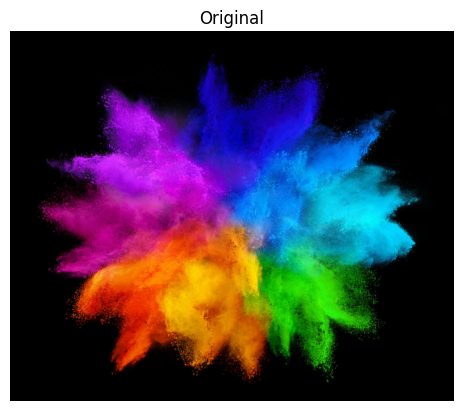

In [11]:
show_image_plt(original_bgr, title='Original')

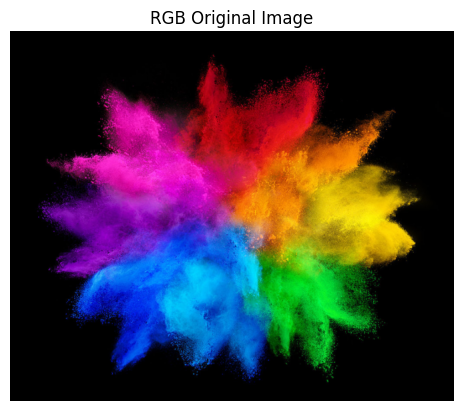

In [12]:
original_rgb = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB)
show_image_plt(original_rgb, title='RGB Original Image')

In [13]:
cmyk_image = rgb_to_cmyk(original_rgb) # แปลงภาพจาก RGB เป็น CMYK

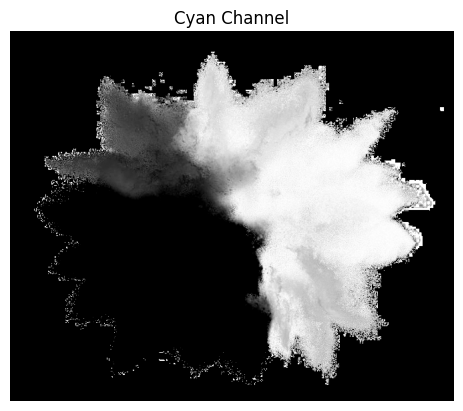

In [14]:
cyan_channel = cmyk_image[:, :, 0]
show_image_plt(cyan_channel, gray=True, title='Cyan Channel')

In [15]:
cyan_mask = np.zeros_like(cyan_channel, dtype='uint8')
cyan_mask[cyan_channel >= 180] = 255 # Threshold: 180

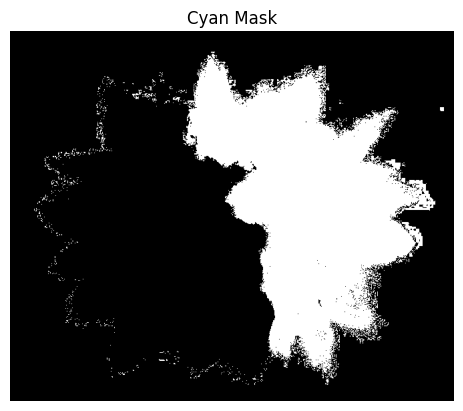

In [17]:
show_image_plt(cyan_mask, gray=True, title='Cyan Mask')

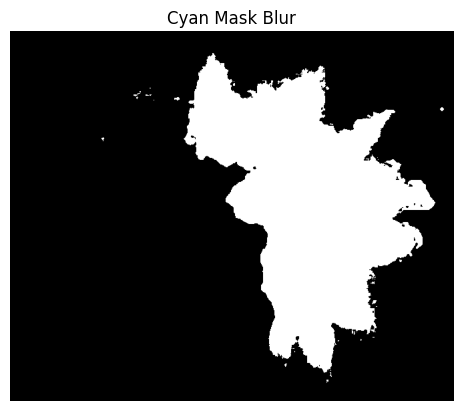

In [18]:
cyan_mask_clean = cv2.medianBlur(cyan_mask, 5)
show_image_plt(cyan_mask_clean, gray=True, title='Cyan Mask Blur')

# HSV

In [19]:
hsv_image = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2HSV)
hue, sat, val = cv2.split(hsv_image)

In [20]:
hue_degrees = hue.astype(np.uint16) * 2

In [21]:
mask_h = ((hue_degrees >= 0) & (hue_degrees <= 150)) | ((hue_degrees >= 330) & (hue_degrees <= 360))
mask_s = (sat >= 120)
mask_v = (val >= 70)

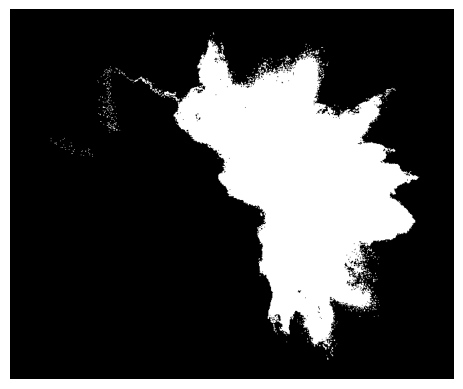

In [22]:
mask_bool = mask_h & mask_s & mask_v
mask_hsv = (mask_bool.astype(np.uint8)) * 255
show_image_plt(mask_hsv, gray=True)

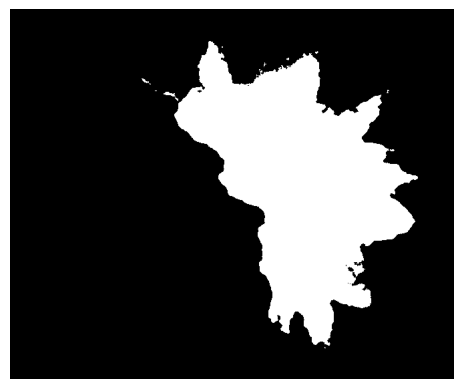

In [23]:
mask_hsv_clean = cv2.medianBlur(mask_hsv, 5)
show_image_plt(mask_hsv_clean, gray=True)

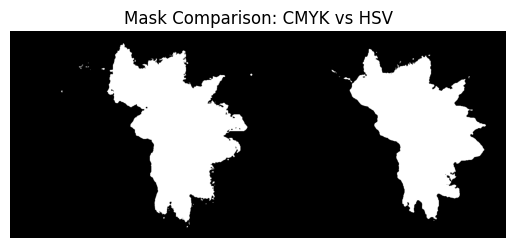

In [24]:
comparison_result = cv2.hconcat([cyan_mask_clean, mask_hsv_clean])
show_image_plt(comparison_result, gray=True, title="Mask Comparison: CMYK vs HSV")

# เพิ่มโค้ด

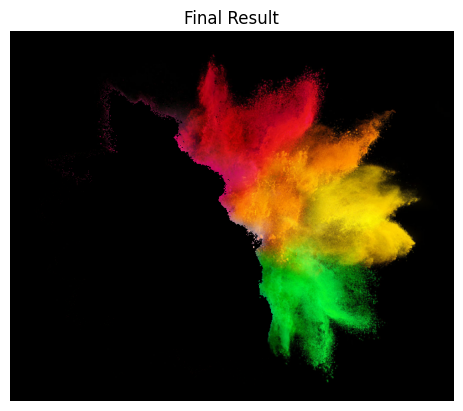

In [26]:
hsv_mask = (hue_degrees > 150) & (hue_degrees <= 330)

new_sat = sat.copy().astype(np.float32)
new_val = val.copy().astype(np.float32)

new_sat[hsv_mask] = 0
new_val[hsv_mask] = 0

s_new = np.clip(new_sat, 0, 255).astype(np.uint8)
v_new = np.clip(new_val, 0, 255).astype(np.uint8)

new_hsv_image = cv2.merge([hue, s_new, v_new])

final_result_rgb = cv2.cvtColor(new_hsv_image, cv2.COLOR_HSV2RGB)

show_image_plt(final_result_rgb, title='Final Result')

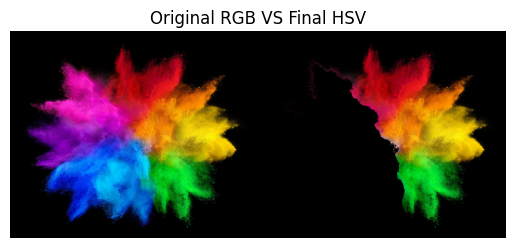

In [27]:
muls = cv2.hconcat([original_rgb, final_result_rgb])
show_image_plt(muls, title='Original RGB VS Final HSV')